# Bibliotecas 


In [1]:
!pip install investpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 16.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 15.6 MB/s eta 0:00:00
  Created wheel for investpy: filename=investpy-1.0.8-py3-none-any.whl size=4481591 sha256=b19f6636769860992bb5a336cb782692c8a2ecd4013bf29560d60ca030c78b50
  Stored in directory: /root/.cache/pip/wheels/76/6f/f7/f6e7537383423f10d7b89c1fca4ad9b6beeb3085338b920a8e
Successfully built investpy


In [2]:
import investpy as inv

In [3]:
import plotly.graph_objects as go   # biblioteca de gráficos interativos  

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,8)


Yelds


In [5]:
bondsBR = inv.get_bonds_list('brazil')         #put your country, or parameter of your choice
bondsUS = inv.get_bonds_list('united states')  #put your country, or parameter of your choice

In [6]:
bondsBR

['Brazil 3M',
 'Brazil 6M',
 'Brazil 9M',
 'Brazil 1Y',
 'Brazil 2Y',
 'Brazil 3Y',
 'Brazil 5Y',
 'Brazil 8Y',
 'Brazil 10Y']

In [7]:
"""bonds_overview = inv.get_bonds_overview('brazil')
bonds_overview"""

ConnectionError: ignored

In [8]:
"""bonds_overviewUS = inv.get_bonds_overview('united states')
bonds_overviewUS"""

ConnectionError: ignored

In [9]:
#inv.news.economic_calendar(time_zone=None, time_filter='time_only', countries=["Brazil"], importances=None, categories=None, from_date="01/11/2021", to_date="06/12/2021")

JSONDecodeError: ignored

In [10]:
pip install requests


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import requests as requests

For one yield

In [12]:

start_date = '01/01/2018'
end_date = '06/12/2021'
FiveYearsBond = inv.get_bond_historical_data(bond = 'Brazil 5Y', from_date = start_date, to_date = end_date )

for i in range(0,len(FiveYearsBond)):
  if FiveYearsBond['	last_close'][i] == FiveYearsBond['	last_close'].min():
    print(FiveYearsBond.index[i])
    print(FiveYearsBond['	last_close'][i])



ConnectionError: ignored

In [ ]:

FiveYearsBond['Close'].plot()

For more than one yield

In [ ]:
start_date = '01/01/2014'
end_date = '14/09/2022'
bonds = pd.DataFrame()

for prazo in bondsBR:
  bonds[prazo] = inv.get_bond_historical_data(prazo, from_date = start_date, to_date = end_date )['last_close']  #catching yields for every interest rate terms

bonds.index = pd.to_datetime(bonds.index)   # transforming in data type mode
bonds


Doing the plot of some defined data

In [ ]:
plt.plot(inv.get_bonds_list('brazil'), bonds.loc['2022-08-26'].values)   # the first argument is the list of bonds available in the country and the second is the specific data.
plt.plot(inv.get_bonds_list('brazil'), bonds.loc['2022-09-13'].values)

plt.legend(['2022-08-26','2022-09-02'])




## Curva de juros americana.

In [ ]:
start_date = '01/01/2014'
end_date = '01/07/2022'
bonds2 = pd.DataFrame()

for prazo in bondsUS:
  bonds2[prazo] = inv.get_bond_historical_data(prazo, from_date = start_date, to_date = end_date )['Close']  #catching yields for every interest rate terms

#bonds2.index = pd.to_datetime(bonds2.index)   # transforming in data type mode
bonds2




plt.plot(inv.get_bonds_list('united states'), bonds2.loc['2021-12-22'].values)   # the first argument is the list of bonds available in the country and the second is the specific data.
plt.plot(inv.get_bonds_list('united states'), bonds2.loc['2022-01-03'].values)
plt.plot(inv.get_bonds_list('united states'), bonds2.loc['2022-04-05'].values)

plt.legend(["2021","03/01","05/03"])

Daily curves

In [ ]:
fig = go.Figure()

for i in bonds.index:
  fig.add_trace(go.Scatter(x= inv.get_bonds_list('brazil'), y= bonds.loc[i],mode = 'lines', name = str(i)))

fig.show()

monthly curves

In [ ]:
start_date = '01/01/2013'
end_date = '06/06/2019'
monthlybonds = pd.DataFrame()

for prazo in bondsBR:
  monthlybonds[prazo] = inv.get_bond_historical_data(prazo, from_date = start_date, to_date = end_date, interval = 'monthly' )['Close']   # Defining the interval

In [ ]:
fig = go.Figure()

for i in monthlybonds.index:
  fig.add_trace(
      go.Scatter(
          x=bondsBR, 
          y=monthlybonds.loc[i], 
          mode='lines', 
          name=str(i),
          visible=False
      )
  )

fig.data[0].visible = True

steps = []

for i in range(len(fig.data)):
  step = dict(
      method='restyle',
      args=['visible', [False] * len(fig.data)],
      label=fig.data[i]['name'][:7]
  )
  step['args'][1][i] = True
  steps.append(step)

sliders = [dict(
    active=0,
    currentvalue={'prefix':"Mês: "},
    pad={'t':10},
    steps=steps
)]

fig.update_layout(
    sliders=sliders,
    yaxis = dict(range=[1,18.5])
)

fig.show()

Pegar algumas coisas no BACEN

In [13]:
def consulta_bc(codigo_bcb):
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)     #esse código é o que aparece lá no site do bc https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries
  df = pd.read_json(url)
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  df.set_index('data', inplace=True)
  return df

In [14]:
selic_meta = consulta_bc(432)

IPCA12 = consulta_bc(13522)


IPCAM = consulta_bc(433)



In [15]:
selic_meta

,valor
data,
1999-03-05,45.00
1999-03-06,45.00
1999-03-07,45.00
1999-03-08,45.00
1999-03-09,45.00
...,...
2023-04-29,13.75
2023-04-30,13.75
2023-05-01,13.75


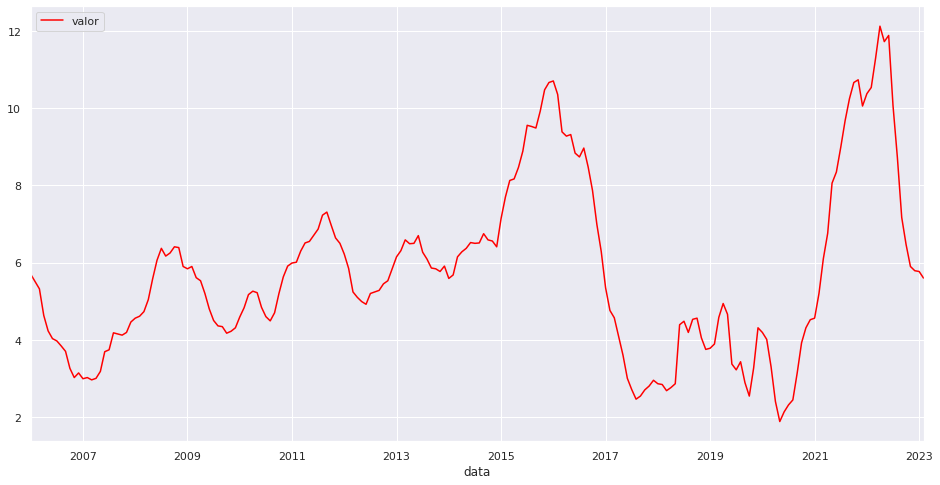

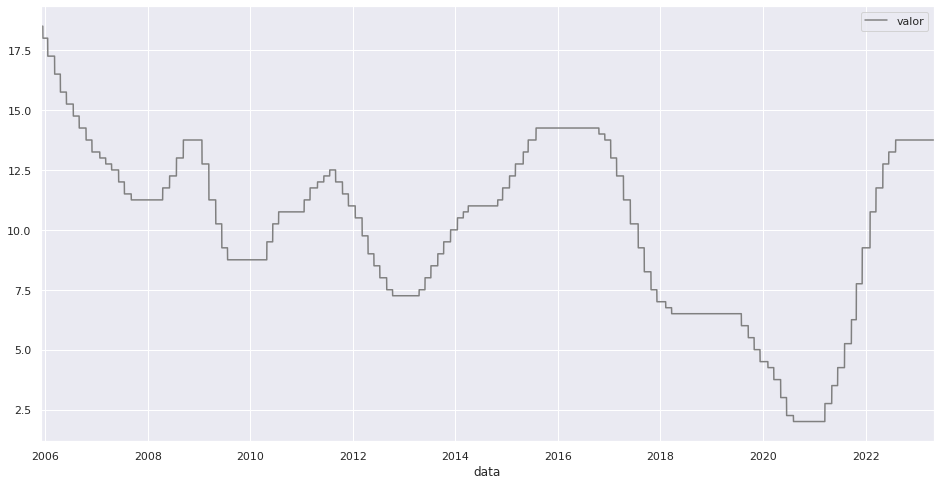

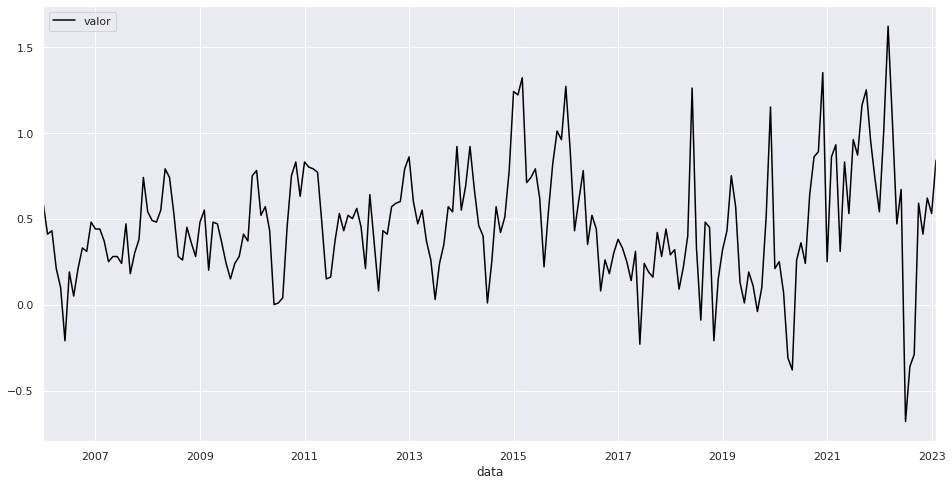

In [16]:
mistura = pd.concat([IPCA12, selic_meta], axis=1)
IPCA12.loc[IPCA12.index>'2005-12-01'].plot(color='red')
selic_meta.loc[selic_meta.index>'2005-12-01'].plot(color='gray')
IPCAM.loc[IPCAM.index>'2005-12-01'].plot(color='black')



#Agrupando a selic em meses
selicM = selic_meta.groupby([pd.Grouper(freq='M'),])['valor'].mean()
mistura = pd.concat([IPCA12, selicM], axis=1)

In [17]:
s2015 = selic_meta[selic_meta.index.year>=2019]
b2015 = bonds[bonds.index.year >=2019]


NameError: ignored

In [18]:
fig = go.Figure()

for i in bondsBR:
  fig.add_trace(go.Scatter(x=b2015.index, y=b2015[i], mode='lines', name=str(i)))

fig.add_trace(go.Scatter(x=s2015.index, y=s2015['valor'], mode='lines', name='SELIC', line={'color':'black'}))

fig.show()


NameError: ignored

# Estratégia de juros

Ponderando a alocação de títulos pela duration e desvio padrão dos mesmos


In [19]:
#que período usar ? --> aqui estou pegando desde 2016

filtered = pd.DataFrame()
filtered['Date'] = bonds.index
filtered['curta'] = list(bonds['Brazil 1Y'])  #definindo a taxa curta
filtered['longa'] = list(bonds['Brazil 3Y'])  #definindo a taxa longa
filtered.set_index('Date',inplace = True)
filtered.dropna(inplace = True)


NameError: ignored

In [ ]:
filtered

#Calculando o desvio padrão de cada título 

import statistics

st_devCurta = statistics.pstdev(filtered['curta'])
st_devLonga = statistics.pstdev(filtered['longa'])

print("Desvio padrão da taxa curta é: " + str(st_devCurta))
print("Desvio padrão da taxa longa é: " + str(st_devLonga))



In [ ]:
import numpy as np
strategy = pd.DataFrame()

factor = np.arange(-3,3.1,0.1)
for i in range (0,len(factor)):
  factor[i] = format(factor[i], ".2f")
strategy['factor'] = factor

strategy["curta"] = filtered['curta'][-1] + strategy['factor'] * (st_devCurta / (st_devCurta +st_devLonga ))
strategy['longa'] = filtered['longa'][-1]+ strategy['factor'] * (st_devLonga / (st_devCurta +st_devLonga ))

#Cálculo do PU atual 
PU_curta = 1000/((1+(filtered['curta'][-1])/100)**1)
PU_longa = 1000/((1+(filtered['longa'][-1])/100)**3)


print("PU da taxa curta é: " + str(PU_curta))
print("PU da taxa longa é: " + str(PU_longa))

strategy['stress_PU_curta'] = 1000/((1+(strategy['curta'])/100)**1)
strategy['stress_PU_longa'] = 1000/((1+(strategy['longa'])/100)**3)

strategy['return_curta'] = ((strategy['stress_PU_curta'] /PU_curta ) -1 )* 100
strategy['return_longa'] = ((strategy['stress_PU_longa'] / PU_longa )-1)* 100

strategy['proportion'] = strategy['return_longa']/strategy['return_curta']

strategy

In [ ]:
strategy['proportion'].plot()


## **Proporcionalizando posição comprada em FTSE100 e vendida em SPX**




In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from datetime import datetime

In [ ]:
def catch_data(code,start_date,end_date):
  ticker = yf.Ticker(code)
  close = ticker.history(period = '1d',start = start_date, end = end_date)["Close"]    #pegar os fechamentos
  return close
  

In [ ]:
Initial = '2022-01-01'
end = '2022-09-01'

#SPX historical data
FTSE = pd.DataFrame(catch_data("^FTSE",Initial,end))
SPX = pd.DataFrame(catch_data("^GSPC",Initial,end))
FTSE.index = FTSE.index.strftime("%Y-%m-%d")
SPX.index = SPX.index.strftime("%Y-%m-%d")

#Merging the dfs
df=pd.DataFrame(index = FTSE.index)
df = SPX.merge(FTSE, left_index=True,right_index = True,suffixes=('SPX','FTSE'))
df['retSPX'] = np.log(df['CloseSPX']/df['CloseSPX'].shift(1))
df['retFTSE'] = np.log(df['CloseFTSE']/df['CloseFTSE'].shift(1)) 
df.dropna(inplace=True)
#Proportionalization will be via beta.


correl = np.corrcoef(df['retSPX'],df['retFTSE'])
varSPX = np.var(df['retSPX'])
varFTSE = np.var(df['retFTSE'])

In [ ]:
from sklearn.model_selection import train_test_split

volSPX = df['retSPX'].rolling(21).std()
volFTSE =df['retFTSE'].rolling(21).std()


pd.DataFrame(volFTSE/volSPX).plot()


#(volSPX/volFTSE).plot()

In [ ]:
correl

In [ ]:
(df['retSPX']-df['retFTSE']).cumsum().plot()